# Precios de las acciones de Walmart

In [9]:
#!pip install pandas-datareader

In [10]:
#!pip install pydataset

In [11]:
#!pip install seaborn

In [12]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [13]:
# importando modulos necesarios
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from pydataset import data
import statsmodels.api as sm 

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 

# graficos incrustados
%matplotlib inline

In [14]:
# Ejemplo serie de tiempo con Pandas
# Creando una serie de tiempo de las acciones de Walmart desde yahoo finance
# https://finance.yahoo.com/quote/WMT?p=WMT
wft = web.DataReader("WMT", 'yahoo', '2016-1-1', '2016-9-30')
wft.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,61.490002,60.360001,60.500000,61.459999,11989200.0,53.333458
2016-01-05,63.049999,61.849998,62.029999,62.919998,13326000.0,54.600422
2016-01-06,63.950001,62.470001,62.480000,63.549999,16564600.0,55.147121
2016-01-07,65.230003,62.919998,62.970001,65.029999,26430000.0,56.431435
2016-01-08,65.410004,63.410000,65.080002,63.540001,17767900.0,55.138443


In [15]:
# filtrando sólo del 2016-02-04 al 2016-02-18
wft['2016-02-04':'2016-02-18']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-04,66.550003,65.010002,65.760002,66.419998,12833400.0,57.637627
2016-02-05,67.529999,65.879997,66.860001,67.000000,14196500.0,58.140942
2016-02-08,67.150002,65.160004,66.500000,66.900002,20743600.0,58.054173
2016-02-09,66.410004,64.680000,65.489998,65.809998,14642400.0,57.108299
2016-02-10,66.589996,65.650002,66.190002,65.790001,9709300.0,57.090942
2016-02-11,65.760002,64.779999,65.019997,65.320000,11186700.0,56.683067
2016-02-12,66.250000,64.870003,65.519997,66.180000,9695500.0,57.429363
2016-02-16,66.800003,65.500000,66.610001,65.900002,11360500.0,57.186386
2016-02-17,66.610001,65.809998,66.099998,66.110001,12426700.0,57.368610


In [16]:
# valores al 2016-02-16
wft.loc['2016-2-16']

High         6.680000e+01
Low          6.550000e+01
Open         6.661000e+01
Close        6.590000e+01
Volume       1.136050e+07
Adj Close    5.718639e+01
Name: 2016-02-16 00:00:00, dtype: float64

In [17]:
# valor de la columna Adj Close al 2016-2-16
wft['Adj Close']['2016-2-16']

57.18638610839844

In [18]:
# filtrando todo febrero de 2016
wft['2016-2']

C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_40712\3433727723.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  wft['2016-2']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,67.930000,65.889999,65.910004,67.500000,14728400.0,58.574829
2016-02-02,67.839996,66.279999,67.300003,66.860001,13585900.0,58.019466
2016-02-03,67.500000,65.070000,67.309998,66.269997,12315600.0,57.507473
2016-02-04,66.550003,65.010002,65.760002,66.419998,12833400.0,57.637627
2016-02-05,67.529999,65.879997,66.860001,67.000000,14196500.0,58.140942
2016-02-08,67.150002,65.160004,66.500000,66.900002,20743600.0,58.054173
2016-02-09,66.410004,64.680000,65.489998,65.809998,14642400.0,57.108299
2016-02-10,66.589996,65.650002,66.190002,65.790001,9709300.0,57.090942
2016-02-11,65.760002,64.779999,65.019997,65.320000,11186700.0,56.683067


In [19]:
# Valores al cierre de cada mes.
wft.asfreq('M', method='ffill')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-31,66.529999,64.739998,64.750000,66.360001,16439100.0,57.585571
2016-02-29,66.949997,66.220001,66.629997,66.339996,9345200.0,57.568203
2016-03-31,69.190002,68.470001,68.750000,68.489998,6283500.0,59.873901
2016-04-30,68.820000,66.360001,68.730003,66.870003,12099000.0,58.457733
2016-05-31,71.000000,70.480003,70.580002,70.779999,8390200.0,62.328854
2016-06-30,73.190002,72.320000,72.570000,73.019997,8713600.0,64.301399
2016-07-31,73.250000,72.760002,73.169998,72.970001,6302200.0,64.257385
2016-08-31,71.639999,71.150002,71.459999,71.440002,6311600.0,63.340733
2016-09-30,72.459999,71.400002,71.500000,72.120003,9982600.0,63.943638


In [20]:
# Valores al cierre de cada mes (días laborales).
wft.asfreq('BM')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-29,66.529999,64.739998,64.750000,66.360001,16439100.0,57.585571
2016-02-29,66.949997,66.220001,66.629997,66.339996,9345200.0,57.568203
2016-03-31,69.190002,68.470001,68.750000,68.489998,6283500.0,59.873901
2016-04-29,68.820000,66.360001,68.730003,66.870003,12099000.0,58.457733
2016-05-31,71.000000,70.480003,70.580002,70.779999,8390200.0,62.328854
2016-06-30,73.190002,72.320000,72.570000,73.019997,8713600.0,64.301399
2016-07-29,73.250000,72.760002,73.169998,72.970001,6302200.0,64.257385
2016-08-31,71.639999,71.150002,71.459999,71.440002,6311600.0,63.340733
2016-09-30,72.459999,71.400002,71.500000,72.120003,9982600.0,63.943638


In [21]:
# valores al cierre de cada trimestre
wft.asfreq('BQ')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-31,69.190002,68.470001,68.75,68.489998,6283500.0,59.873901
2016-06-30,73.190002,72.320000,72.57,73.019997,8713600.0,64.301399
2016-09-30,72.459999,71.400002,71.50,72.120003,9982600.0,63.943638


## Desplazando los valores de la serie
Una operación común en los datos de series de tiempo es desplazar los valores hacia atrás y adelante en el tiempo, como por ejemplo para calcular el cambio porcentual de una muestra a otra. En Pandas podemos utilizar el método .shift().

In [22]:
# desplazando el 1 dia el valor de cierre
desplazado = wft['Adj Close'].shift(1)
desplazado[:5]

Date
2016-01-04          NaN
2016-01-05    53.333458
2016-01-06    54.600422
2016-01-07    55.147121
2016-01-08    56.431435
Name: Adj Close, dtype: float64

In [23]:
# calculando el porcentaje de variación del día.
variacion_diaria = wft['Adj Close'] / wft['Adj Close'].shift(1) - 1
wft['var_diaria'] = variacion_diaria
wft['var_diaria'][:5]

Date
2016-01-04         NaN
2016-01-05    0.023756
2016-01-06    0.010013
2016-01-07    0.023289
2016-01-08   -0.022913
Name: var_diaria, dtype: float64

In [24]:
# mismo resultado utilizando pct_change()
wft['Adj Close'].pct_change()[:5]

Date
2016-01-04         NaN
2016-01-05    0.023756
2016-01-06    0.010013
2016-01-07    0.023289
2016-01-08   -0.022913
Name: Adj Close, dtype: float64

In [25]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + wft['Adj Close'].pct_change()).cumprod()
wft['rend_diario'] = rendimiento_diario
wft['rend_diario'][:5]

Date
2016-01-04         NaN
2016-01-05    1.023756
2016-01-06    1.034006
2016-01-07    1.058087
2016-01-08    1.033843
Name: rend_diario, dtype: float64

## Visualizando las series de tiempo
Una operación fundamental para entender el comportamiento de una serie de tiempo y poder determinar si se trata de una serie estacionaria o no; es realizar gráficos de la misma. En Pandas esto lo podemos realizar en forma muy sencilla con el método .plot().

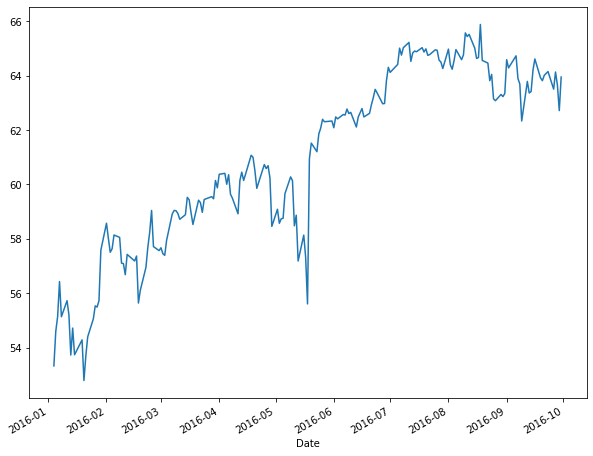

In [26]:
# graficando Adj Close
plot = wft['Adj Close'].plot(figsize=(10, 8))

In [27]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
wft_ciclo, wft_tend = sm.tsa.filters.hpfilter(wft['Adj Close'])
wft['tend'] = wft_tend

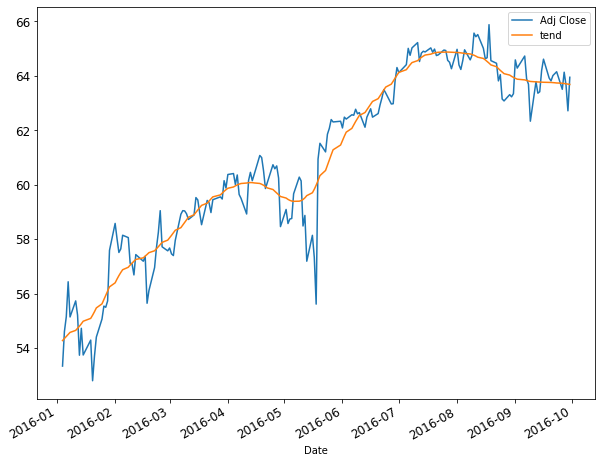

In [28]:
# graficando la variacion del precio real con la tendencia.
wft[['Adj Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

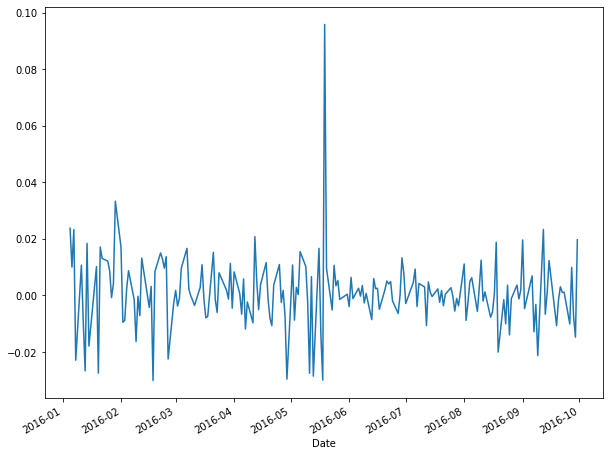

In [29]:
# graficando rendimiento diario
plot = wft['var_diaria'].plot(figsize=(10, 8))

## Promedios móviles y descomposición
Pandas también nos ofrece una serie de funciones para calcular estadísticas móviles, en ellas la función estadística se calcula sobre una ventana de datos representados por un determinado período de tiempo y luego se desplaza la ventana de datos por un intervalo especificado, calculando continuamente la estadística, siempre y cuando la ventana este dentro de las fechas de la serie de tiempo. El ejemplo más utilizado es el de media móvil, que se usa comúnmente en el análisis de series de tiempo financieras para suavizar las fluctuaciones a corto plazo y poner de relieve las tendencias a largo plazo en los datos.

Otra técnica interesante que podemos intentar también es la descomposición. Esta es una técnica que trata de descomponer una serie de tiempo en su tendencia, su estacionalidad y sus factores residuales. Statsmodels viene con una función de descomposición que nos facilita en sobremanera el trabajo. Veamos unos ejemplos.

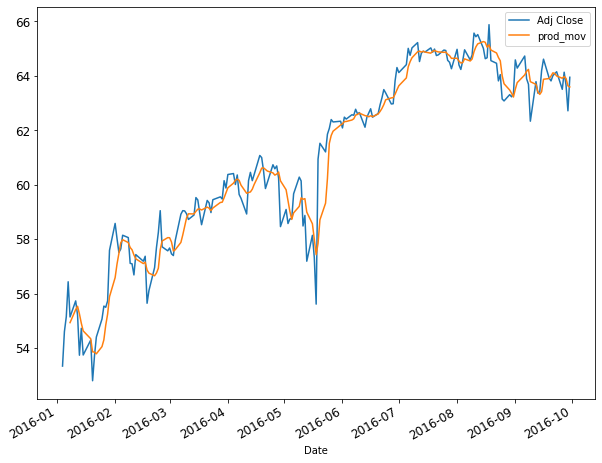

In [30]:
# Calculando promedios móviles cada 5 días
wft_ma = pd.Series(wft['Adj Close']).rolling(window=5).mean()
wft['prod_mov'] = wft_ma
plot = wft[['Adj Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

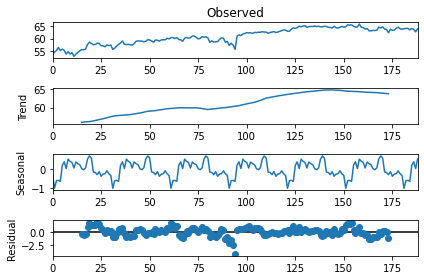

In [31]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(wft['Adj Close'].values,
                                                  model='additive', period=30)  
fig = descomposicion.plot()

# Pronosticando la serie con ARIMA
Como podemos observar en los gráficos que realizamos anteriormente, el comportamiento de la serie de tiempo con la que estamos trabajando parece ser totalmente aleatorio y las medidas móviles que calculamos tampoco parecen ser de mucha utilidad para acercar la serie a un comportamiento estacionario. De todas formas podemos intentar aplicar un modelo ARIMA sobre la serie y ver que tan bien nos va con el pronostico del modelo. El modelo ARIMA es similar a una regresión estadística pero aplicando los conceptos de las series de tiempo; por tanto, los pronósticos del modelo vienen explicadas por los datos del pasado y no por variables independientes.

order : The (p,d,q) order of the model for the autoregressive, differences, and moving average components. d is always an integer, while p and q may either be integers or lists of integers.

d:\trabajo\bpc\big data & data science\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\trabajo\bpc\big data & data science\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provid

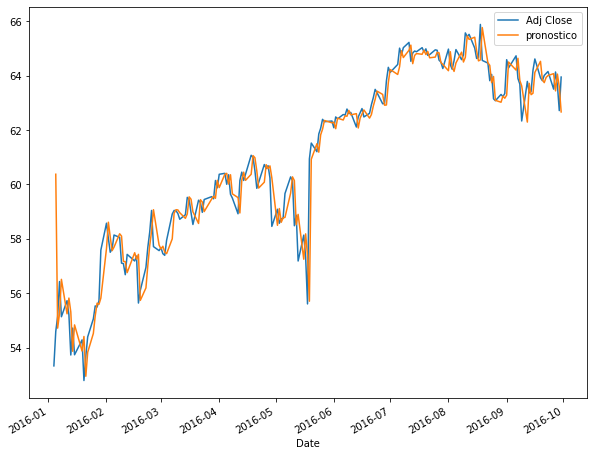

In [32]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(wft['Adj Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit()  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['Adj Close', 'pronostico']].plot(figsize=(10, 8))  

Aquí el modelo parece ser bastante efectivo, las líneas en el gráfico son muy similares. Pero para armar el modelo hemos utilizado el valor de cierre de la acción, y la variación de precio en el día a día es muy pequeña en comparación al precio absoluto. Lo que realmente nos interesa predecir es la variación diaria del precio de la acción, por lo tanto deberíamos armar el modelo utilizando la columna de variación diaria que calculamos previamente.

d:\trabajo\bpc\big data & data science\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\trabajo\bpc\big data & data science\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provid

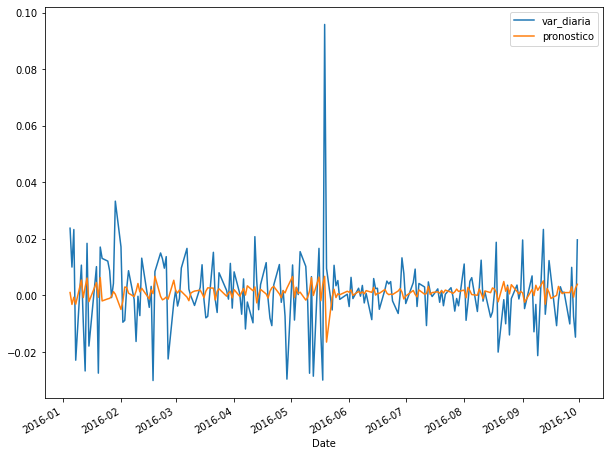

In [33]:
# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(wft['var_diaria'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit()  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['var_diaria', 'pronostico']].plot(figsize=(10, 8)) 

En este gráfico podemos ver que es bastante obvio que el pronóstico esta muy lejos. Nuestro modelo predice variaciones muy pequeñas en comparación con lo que ocurre en la realidad del día a día. Este era un resultado esperado ya que solo aplicamos un modelo sencillo de promedios móviles a una serie no estacionaria; después de todo, si fuera tan fácil predecir el movimiento del mercado, todos seríamos millonarios!. No hay suficiente información en los días anteriores para poder predecir con exactitud lo que va a pasar al día siguiente.